In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

First we need to import our data, where the dimension are the variables we are taking into account in our dataset.

In [2]:
# Original data to train the SOM (5 dimensions)
data_original = np.random.rand(100, 5)

We need then to train our Self Organizing Maps on the data we have.

In [3]:
# Creating the SOM
som = MiniSom(3, 3, 5, sigma=0.3, learning_rate=0.5)
som.train_random(data_original, 1000)

Additionally, we generate perturbed data based on this instance, which is crucial for our explanation.
This placeholder will later be replaced by perturbed data obtained from Lime's library.

In [4]:
instance_to_explain = np.random.rand(5)

perturbed_data = np.random.rand(10, 5)

Next, we calculate the distances between the instance to explain and the perturbed data, considering the SOM's topology.\
This calculation is vital for identifying the perturbed data point most similar to the instance within the SOM.

In [5]:
# Calculating distances on the SOM
def distance_on_som(instance, perturbed_data):
    instance_position = som.winner(instance)
    perturbed_positions = [som.winner(perturbed) for perturbed in perturbed_data]
    distances = [np.linalg.norm(np.array(instance_position) - np.array(pos)) for pos in perturbed_positions]
    return distances

# Calculating distances between the instance to explain and perturbed data on the SOM
distances = distance_on_som(instance_to_explain, perturbed_data)

Finally, we locate and designate the perturbed data point that exhibits the smallest distance to our instance.\
This designated data point is considered the best perturbed data for explaining the specific instance and we can continue then with the lime method.

In [6]:
# Finding the perturbed data closest to the instance to explain on the SOM
best_perturbed_data = perturbed_data[np.argmin(distances)]

print("Instance to explain:", instance_to_explain)
print("Best perturbed data:", best_perturbed_data)


Instance to explain: [0.72506545 0.7612224  0.76715454 0.91921155 0.34728768]
Best perturbed data: [0.56387802 0.40370439 0.72217228 0.33879032 0.23198807]


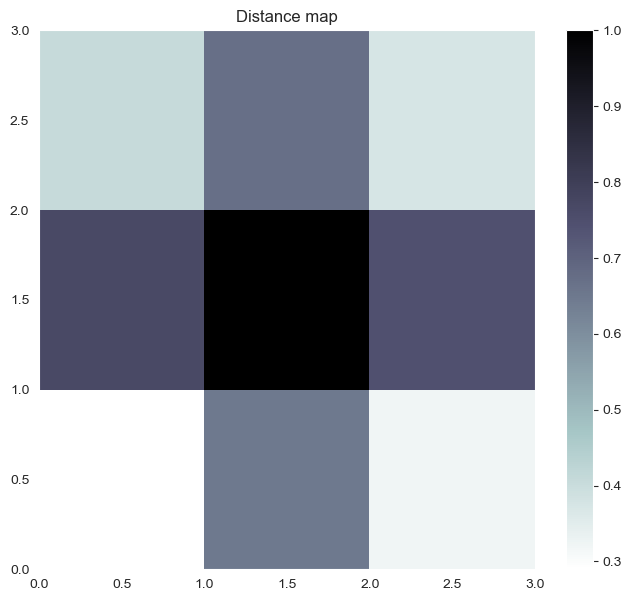

Instance centroid: (1, 0)
Perturbed instances centroids: [(array([0.61894138, 0.89765128, 0.73809145, 0.32798913, 0.43088182]), (1, 0)), (array([0.85214448, 0.29817504, 0.12489255, 0.18768582, 0.62639381]), (1, 0)), (array([0.15277305, 0.86819423, 0.29271641, 0.36263018, 0.84375394]), (1, 2)), (array([0.56387802, 0.40370439, 0.72217228, 0.33879032, 0.23198807]), (1, 0)), (array([0.6781353 , 0.75283115, 0.72231949, 0.2492684 , 0.31985147]), (1, 0)), (array([0.92630895, 0.90650874, 0.48957079, 0.55340608, 0.93806452]), (1, 0)), (array([0.77213294, 0.70080557, 0.41136115, 0.3953604 , 0.9635227 ]), (1, 2)), (array([0.98222542, 0.69382479, 0.5424236 , 0.06070206, 0.37300707]), (1, 0)), (array([0.49519134, 0.63233505, 0.68933229, 0.79113057, 0.44034751]), (2, 0)), (array([0.94628525, 0.63776221, 0.51901609, 0.69481797, 0.93691751]), (1, 0))]

Instances in the same cluster [0.61894138 0.89765128 0.73809145 0.32798913 0.43088182] (1, 0)

Instances in the same cluster [0.85214448 0.29817504 0.1

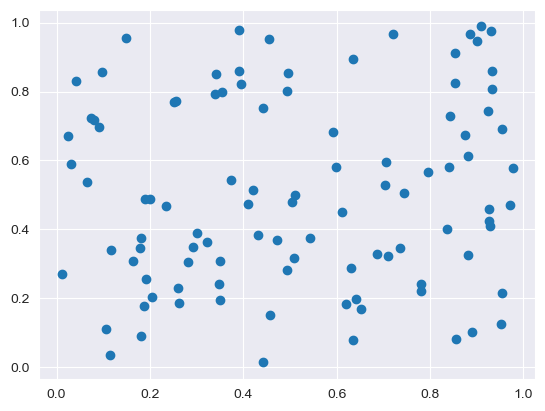

In [7]:
#use the som class test
from somlime import som

som_shape  = (3,3)

som_model = som.SOM(som_shape , data_original.shape[1], sigma=0.3, learning_rate=0.5)
som_model.train(data_original, 1000)
# https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
#plot 
som_model.plot_distance_map()


distances = som_model.distance_to_centroids(instance_to_explain, perturbed_data)
print(distances)